CRIME DATASET

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

READ DATA

In [18]:
Data = pd.read_csv('drive/MyDrive/ML2022/sensor_readings_2.csv')
D=Data.to_numpy()
dim=np.shape(D)
print(dim)
DF=np.copy(D)
print(DF)

(5456, 3)
[[1.687 0.445 'Slight-Right-Turn']
 [1.687 0.449 'Slight-Right-Turn']
 [1.687 0.449 'Slight-Right-Turn']
 ...
 [0.873 0.642 'Sharp-Right-Turn']
 [0.967 0.635 'Move-Forward']
 [0.854 0.628 'Sharp-Right-Turn']]


In [19]:
counter=0
for i in range(dim[0]):
  if D[i,dim[1]-1] == 'Slight-Right-Turn' or D[i,dim[1]-1] == 'Slight-Left-Turn':
    DF=np.delete(DF,(counter), axis=0)
    counter=counter-1
  counter=counter+1
DF = np.where(DF == 'Move-Forward' , -1, DF)
DF = np.where(DF == 'Sharp-Right-Turn', 1, DF)
print(DF)

[[0.753 0.457 1]
 [0.744 0.462 1]
 [0.735 0.467 1]
 ...
 [0.873 0.642 1]
 [0.967 0.635 -1]
 [0.854 0.628 1]]


EDA

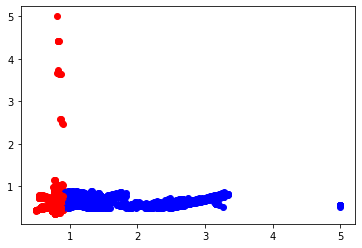

In [21]:
fig, ax = plt.subplots()
for i in range(np.shape(DF)[0]):
  if DF[i,2]== 1:
    ax.plot(DF[i,0],DF[i,1],'ro')
  elif DF[i,2]== -1:
    ax.plot(DF[i,0],DF[i,1],'bo')

In [26]:
dim=np.shape(DF)
print(dim)
il=round(0.40*dim[0])
i=np.random.permutation(dim[0])
X=DF[i[0:il],0:dim[1]-1]
Y=DF[i[0:il],dim[1]-1]
Y=Y.astype('int')
print(Y[0:10])
print(X[0:10,:])
XT=DF[i[il+1:dim[0]],0:dim[1]-1]
YT=DF[i[il+1:dim[0]],dim[1]-1]
YT=YT.astype('int')


(4302, 3)
[-1 -1  1 -1  1  1 -1 -1 -1 -1]
[[2.603 0.672]
 [3.051 0.758]
 [0.894 0.53]
 [1.344 0.641]
 [0.826 0.578]
 [0.832 0.765]
 [1.217 0.732]
 [1.058 0.711]
 [1.197 0.584]
 [1.557 0.758]]


NORMALIZE DATA

In [ ]:
scalerX = preprocessing.MinMaxScaler()
X = scalerX.fit_transform(X)
XT = scalerX.transform(XT)

MODEL SELECTION (HYPERPARAMETER TUNING)

In [ ]:
grid = {'C':       np.logspace(-4,3,5),
        'kernel':   ['rbf'],
        'gamma':    np.logspace(-4,3,5)}
MS = GridSearchCV(estimator = SVC(),
                  param_grid = grid,
                  scoring = 'balanced_accuracy',
                  cv = 10,
                  verbose = 0)
H = MS.fit(X,Y)

TRAIN MODEL

In [ ]:
M = SVC(C = H.best_params_['C'],
        kernel = H.best_params_['kernel'],
        gamma = H.best_params_['gamma'])
M.fit(X,Y)

SVC(C=1000.0, gamma=17.78279410038923)

TEST SET

In [ ]:
YF = M.predict(XT)
confusion_matrix(YT,YF)

array([[338,   0],
       [  0, 306]])

Show the results

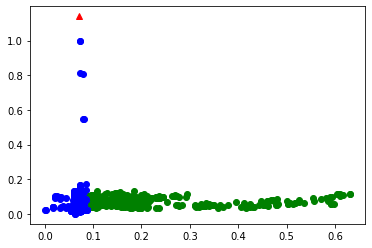

In [ ]:
fig, ax = plt.subplots()
for i in range(np.shape(YF)[0]):
  if YF[i]==YT[i] and YT[i]==1:
    ax.plot(XT[i,0],XT[i,1],'bo')
  elif YF[i]==YT[i] and YT[i]==-1:
    ax.plot(XT[i,0],XT[i,1],'go')
  elif YF[i]!=YT[i] and YT[i]==1:
    ax.plot(XT[i,0],XT[i,1],'r^')
  elif YF[i]!=YT[i] and YT[i]==-1:
    ax.plot(XT[i,0],XT[i,1],'r^') 

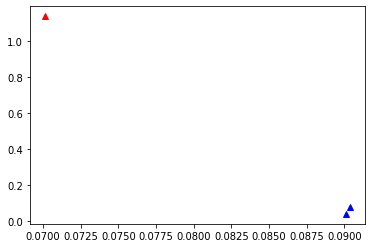

In [ ]:
fig, ax = plt.subplots()
for i in range(np.shape(YF)[0]):
  if YF[i]!=YT[i] and YT[i]==1:
    ax.plot(XT[i,0],XT[i,1],'r^')
  elif YF[i]!=YT[i] and YT[i]==-1:
    ax.plot(XT[i,0],XT[i,1],'b^') 

TREE

In [27]:
maxDepth=3
grid = {'min_samples_leaf': [8,16,32,64,96,128]}
MS = GridSearchCV(estimator = DecisionTreeClassifier(),
                  param_grid = grid,
                  scoring = 'neg_mean_absolute_error',
                  cv = 10,
                  verbose = 0)
H = MS.fit(X,Y)
M = DecisionTreeClassifier(min_samples_leaf=H.best_params_['min_samples_leaf'],
                           max_depth=maxDepth)
M.fit(X,Y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)

In [28]:
text_representation = tree.export_text(M)
print(text_representation)

|--- feature_0 <= 0.90
|   |--- class: 1
|--- feature_0 >  0.90
|   |--- class: -1



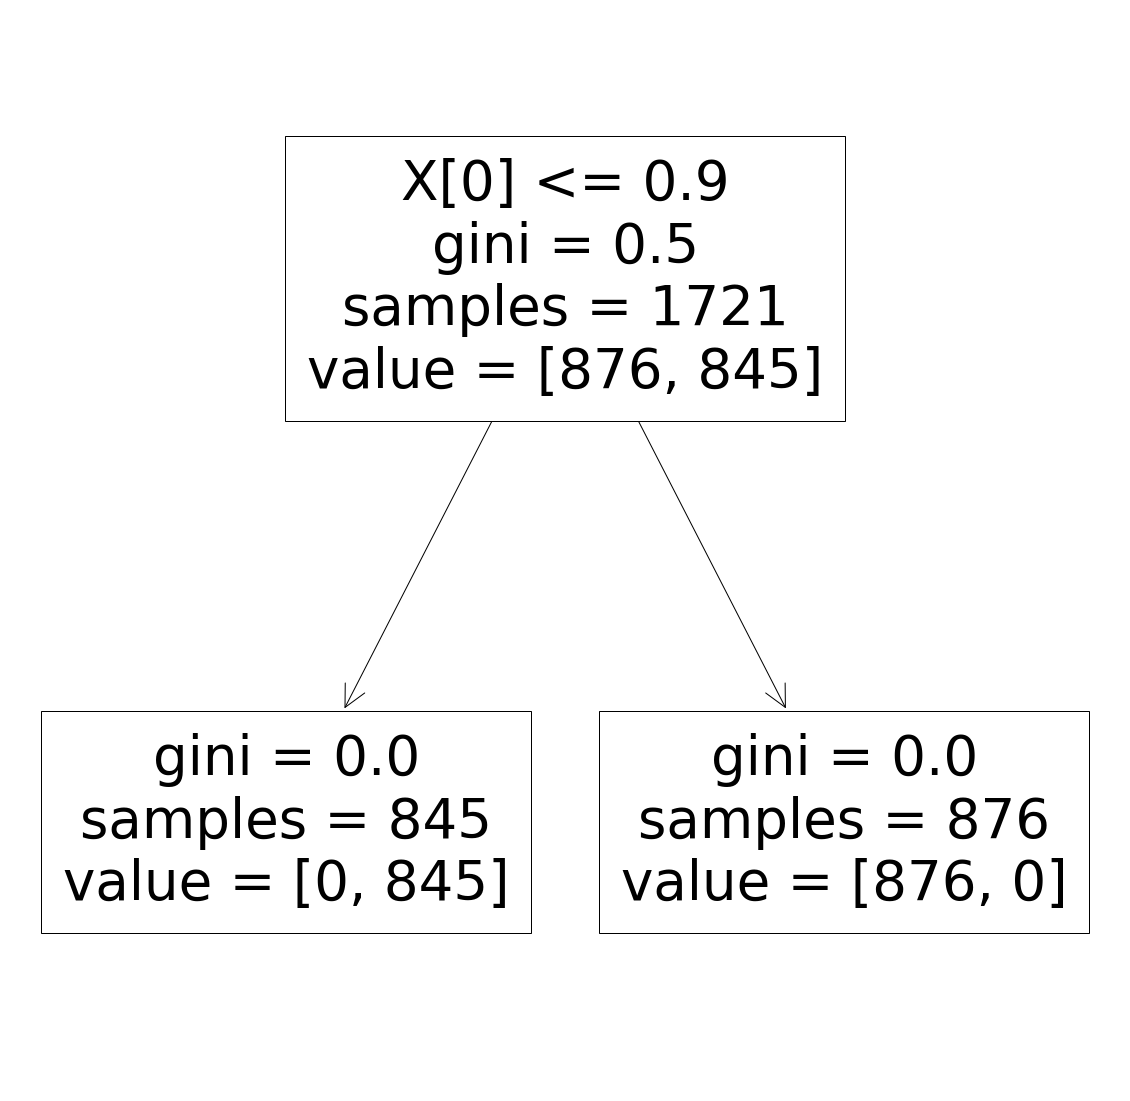

In [29]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(M)

In [30]:
YF = M.predict(XT)
confusion_matrix(YT,YF)

array([[1329,    0],
       [   0, 1251]])